标准化后的协方差矩阵：
                                    sensible_heat  latent_heat  \
sensible_heat                            1.000585    -0.643496   
latent_heat                             -0.643496     1.000585   
ground_temperature                      -0.003771     0.077340   
rain_energy                              0.064847    -0.065456   
outgoing_long_wave_radiation             0.101786    -0.332443   
incoming_long_wave_radiation             0.011378    -0.204761   
net_long_wave_radiation                 -0.042651    -0.060423   
reflected_short_wave_radiation           0.306518    -0.387210   
incoming_short_wave_radiation            0.334299    -0.475354   
net_short_wave_radiation                 0.335391    -0.604359   
parametrized_albedo                      0.095314     0.471814   
incoming_short_wave_on_horizontal        0.345042    -0.477206   
direct_incoming_short_wave               0.358843    -0.466493   
diffuse_incoming_short_wave              0.123387    -0.294246  

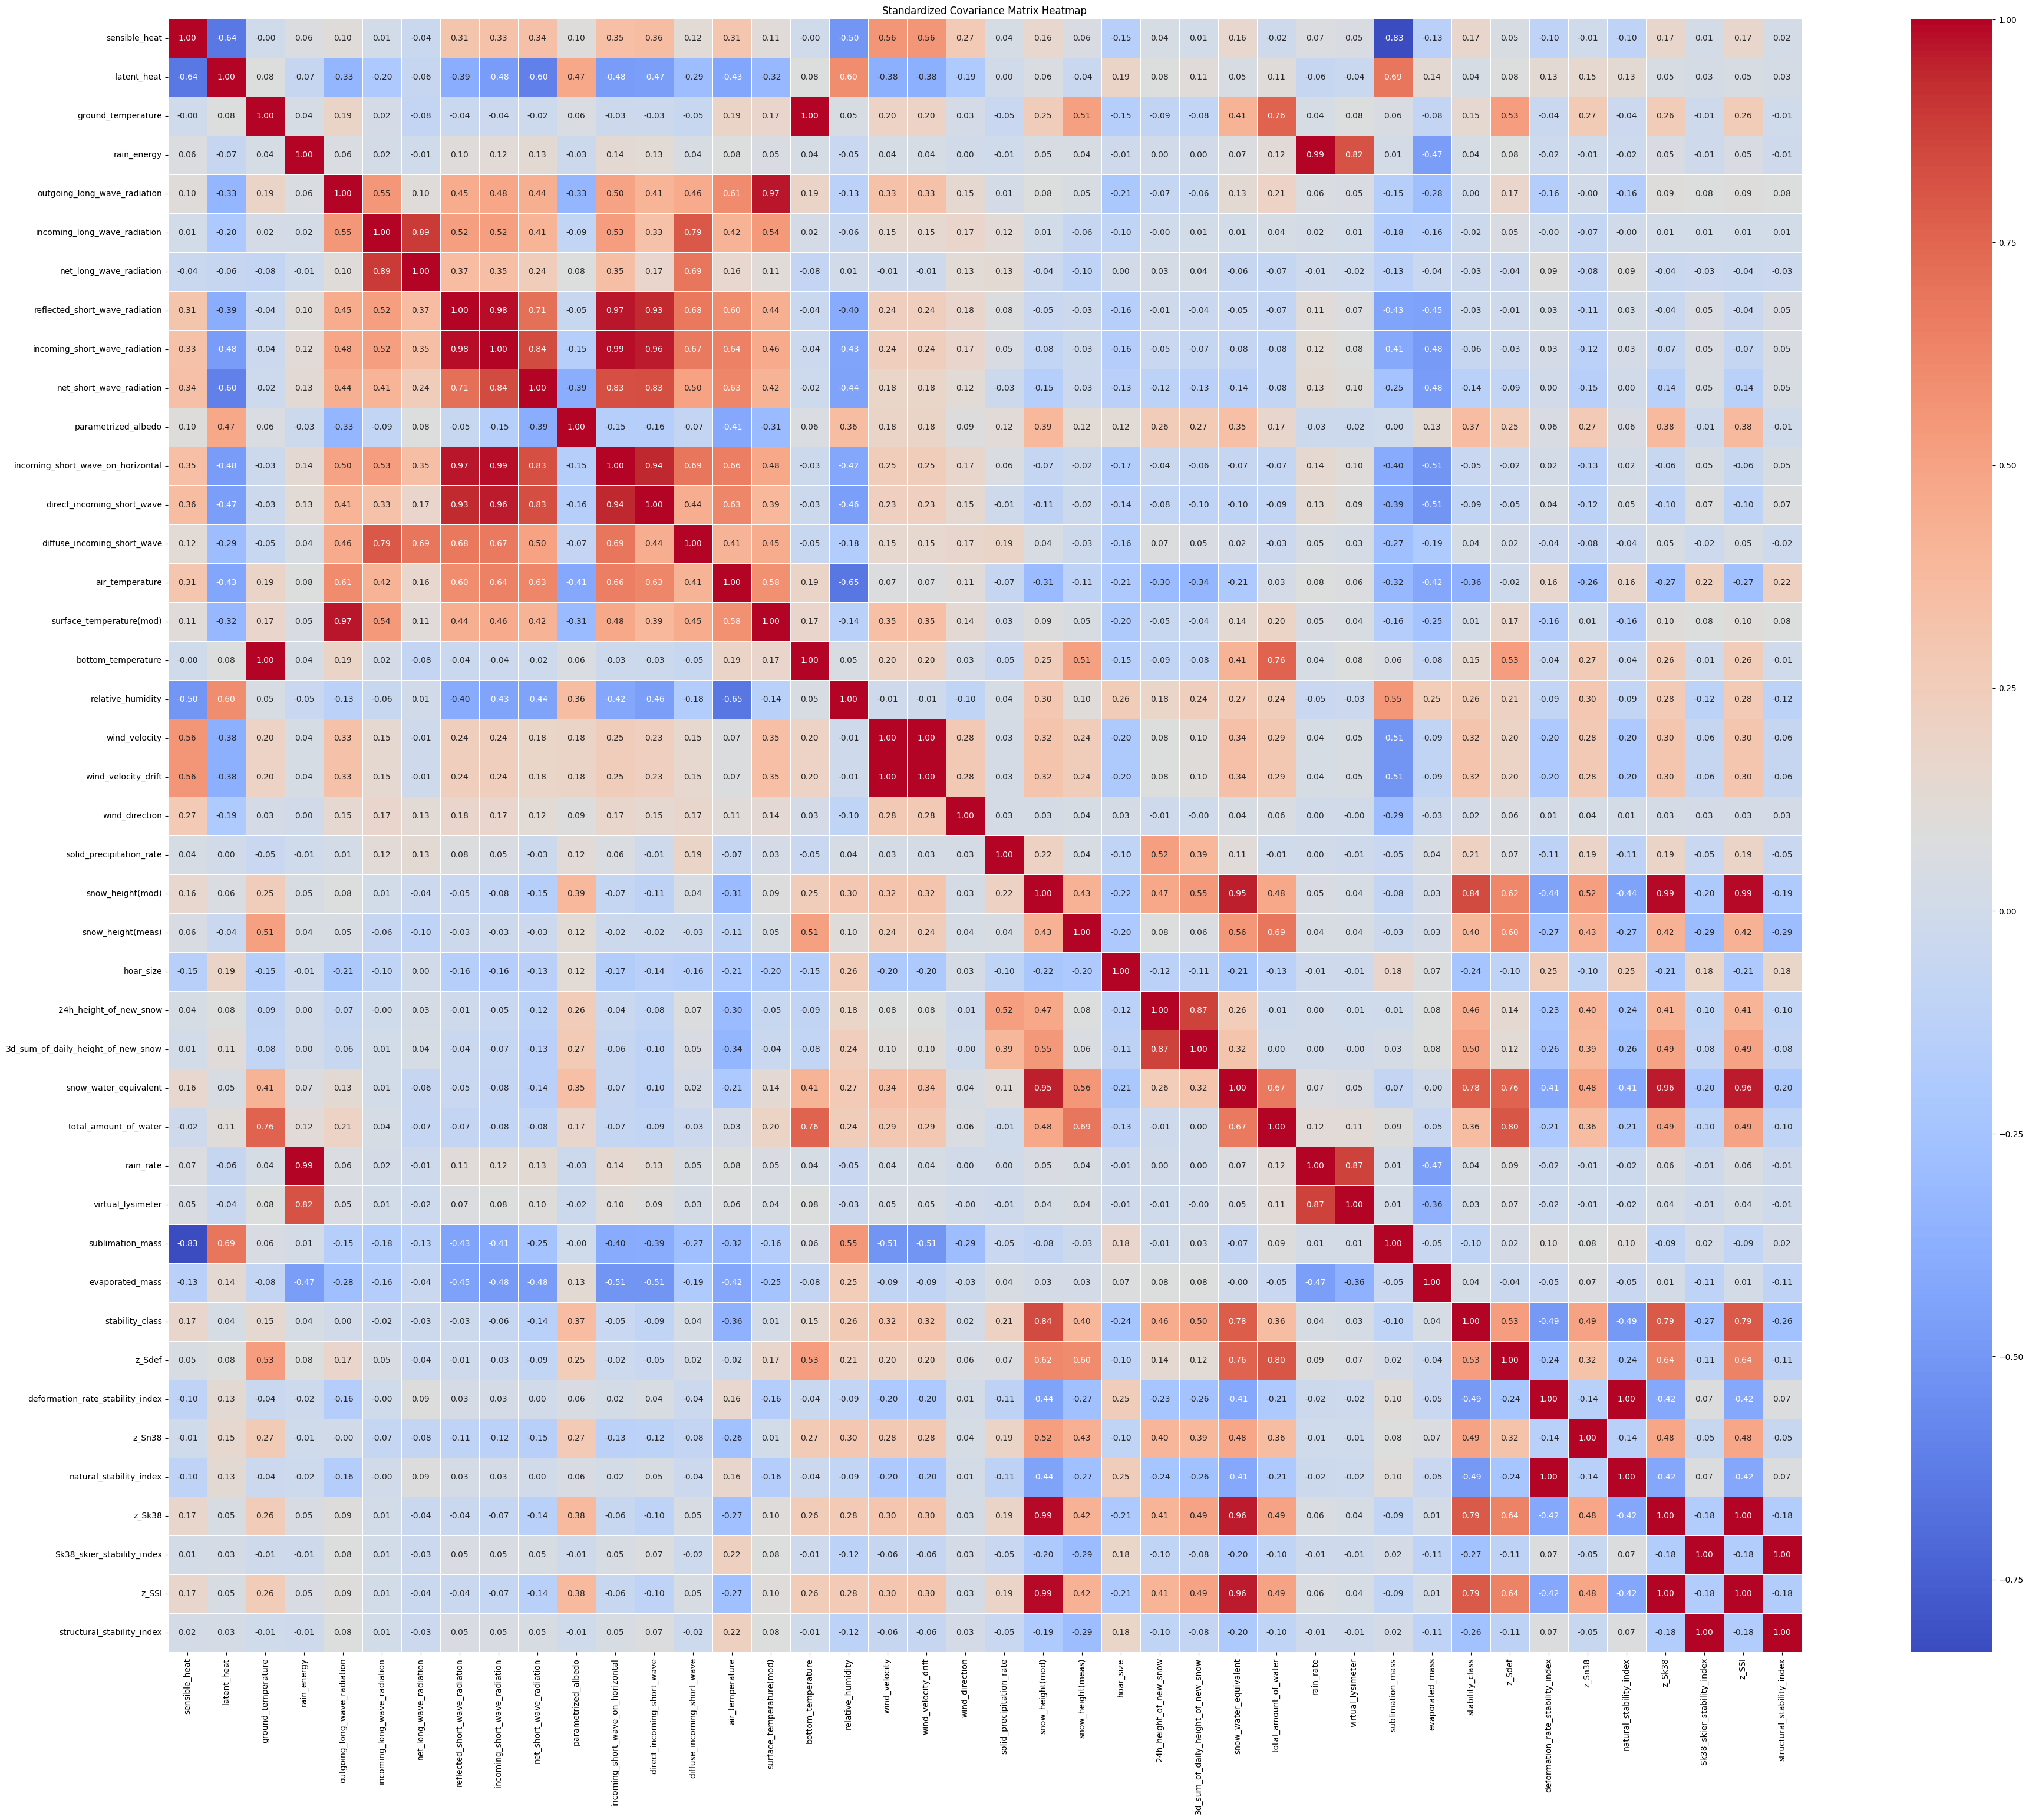


正相关性较高的特征对：
ground_temperature 与 bottom_temperature 的协方差为 1.00
rain_energy 与 rain_rate 的协方差为 0.99
rain_energy 与 virtual_lysimeter 的协方差为 0.82
outgoing_long_wave_radiation 与 surface_temperature(mod) 的协方差为 0.97
incoming_long_wave_radiation 与 net_long_wave_radiation 的协方差为 0.89
reflected_short_wave_radiation 与 incoming_short_wave_radiation 的协方差为 0.98
reflected_short_wave_radiation 与 incoming_short_wave_on_horizontal 的协方差为 0.97
reflected_short_wave_radiation 与 direct_incoming_short_wave 的协方差为 0.93
incoming_short_wave_radiation 与 net_short_wave_radiation 的协方差为 0.84
incoming_short_wave_radiation 与 incoming_short_wave_on_horizontal 的协方差为 0.99
incoming_short_wave_radiation 与 direct_incoming_short_wave 的协方差为 0.96
net_short_wave_radiation 与 incoming_short_wave_on_horizontal 的协方差为 0.83
net_short_wave_radiation 与 direct_incoming_short_wave 的协方差为 0.83
incoming_short_wave_on_horizontal 与 direct_incoming_short_wave 的协方差为 0.94
wind_velocity 与 wind_velocity_drift 的协方差为 1.00
snow_height(mod) 与 snow_water

In [1]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 读取数据
file_path = '/home/develop/Station/data/csv/station_normalized.csv'
df = pd.read_csv(file_path)

# 查看数据结构，确认第一列是时间戳，删除时间戳列
df = df.drop(columns=['timestamp'])

# 使用StandardScaler进行标准化处理
scaler = StandardScaler()
df_standardized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# 计算标准化后的协方差矩阵
cov_matrix_standardized = df_standardized.cov()

# 输出协方差矩阵
print("标准化后的协方差矩阵：")
print(cov_matrix_standardized)

# 可视化标准化后的协方差矩阵
plt.figure(figsize=(48, 36))
sns.heatmap(cov_matrix_standardized, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, square=True)
plt.title("Standardized Covariance Matrix Heatmap")
plt.savefig("standardized_covariance_matrix_heatmap.png", bbox_inches='tight')
plt.show()

# 设置一个阈值，用于筛选相关性较强的特征对
threshold = 0.8  # 可以根据需要调整此阈值

# 查找正相关和负相关性较高的特征对
positive_correlations = []
negative_correlations = []

# 遍历协方差矩阵中的元素，排除对角线
for i in range(len(cov_matrix_standardized.columns)):
    for j in range(i + 1, len(cov_matrix_standardized.columns)):
        cov_value = cov_matrix_standardized.iloc[i, j]
        # 绝对值大于阈值，说明相关性较强
        if cov_value > threshold:
            positive_correlations.append((cov_matrix_standardized.columns[i], cov_matrix_standardized.columns[j], cov_value))
        elif cov_value < -threshold:
            negative_correlations.append((cov_matrix_standardized.columns[i], cov_matrix_standardized.columns[j], cov_value))

# 输出相关性较强的特征对
print("\n正相关性较高的特征对：")
for pair in positive_correlations:
    print(f"{pair[0]} 与 {pair[1]} 的协方差为 {pair[2]:.2f}")

print("\n负相关性较高的特征对：")
for pair in negative_correlations:
    print(f"{pair[0]} 与 {pair[1]} 的协方差为 {pair[2]:.2f}")
